# CS-GY 6053 Foundations of Data Science

1.1 **Project Proposal** \
Analyzing the Interplay Between Ethnicity,Literacy, and Numeracy Skills in Educational Outcomes

1.2 **Project Question/Estimand** \
This project aims to unravel the complex interactions between students' ethnicity, their literacy (reading score), and numeracy (math score) skills, to understand the causal pathways influencing educational outcomes. The central question guiding our investigation is: How does ethnicity and reading skills jointly impact math performance among students?

1.3 **Data Description** \
Our analysis will leverage a dataset encompassing student demographics (with a focus on ethnicity), math scores, and reading scores across multiple schools over one academic year. It includes detailed performance metrics alongside background demographic information, allowing for a nuanced exploration of the proposed causal relationships.

<img src="https://i.ibb.co/hH14HXC/Screenshot-from-2024-05-06-12-59-34.png" />

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import pymc as pm
import arviz as az
from scipy import stats
from scipy.special import expit as logistic

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_context("talk")
plt.style.use('dark_background')
def standardize(series):
    return (series - series.mean()) / series.std()

In [ ]:
# Read the dataset
df=pd.read_csv('stud_perf_exam.csv')
df.loc[:, "r"] = standardize(df["reading score"])
df.loc[:, "m"] = standardize(df["math score"])

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,r,m
0,female,group B,bachelor's degree,standard,none,72,72,74,0.193902,0.389828
1,female,group C,some college,standard,completed,69,90,88,1.426762,0.191979
2,female,group B,master's degree,standard,none,90,95,93,1.769223,1.576922
3,male,group A,associate's degree,free/reduced,none,47,57,44,-0.833482,-1.258913
4,male,group C,some college,standard,none,76,78,75,0.604855,0.653627


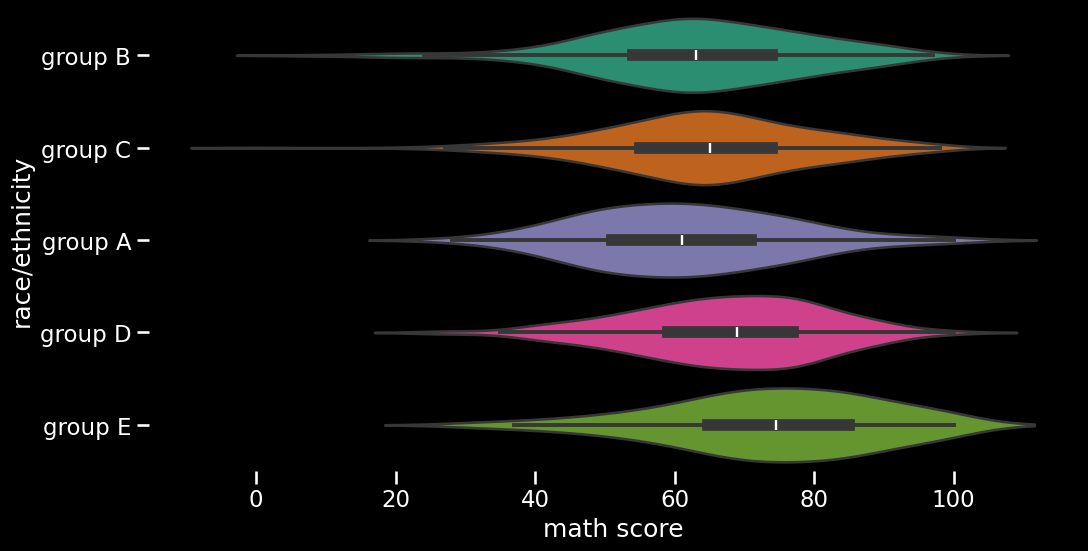

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['race/ethnicity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='math score', y='race/ethnicity', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

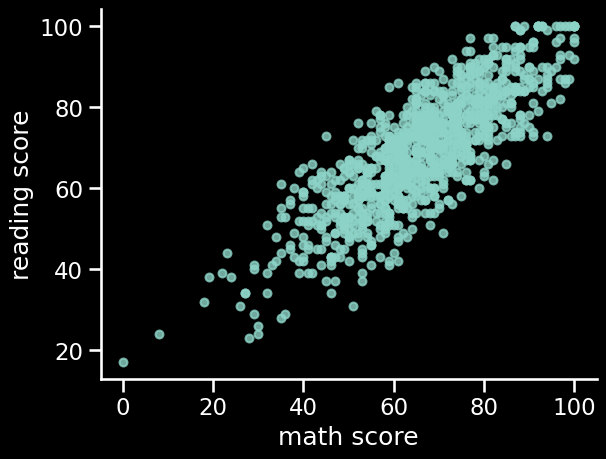

In [ ]:
df.plot(kind='scatter', x='math score', y='reading score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

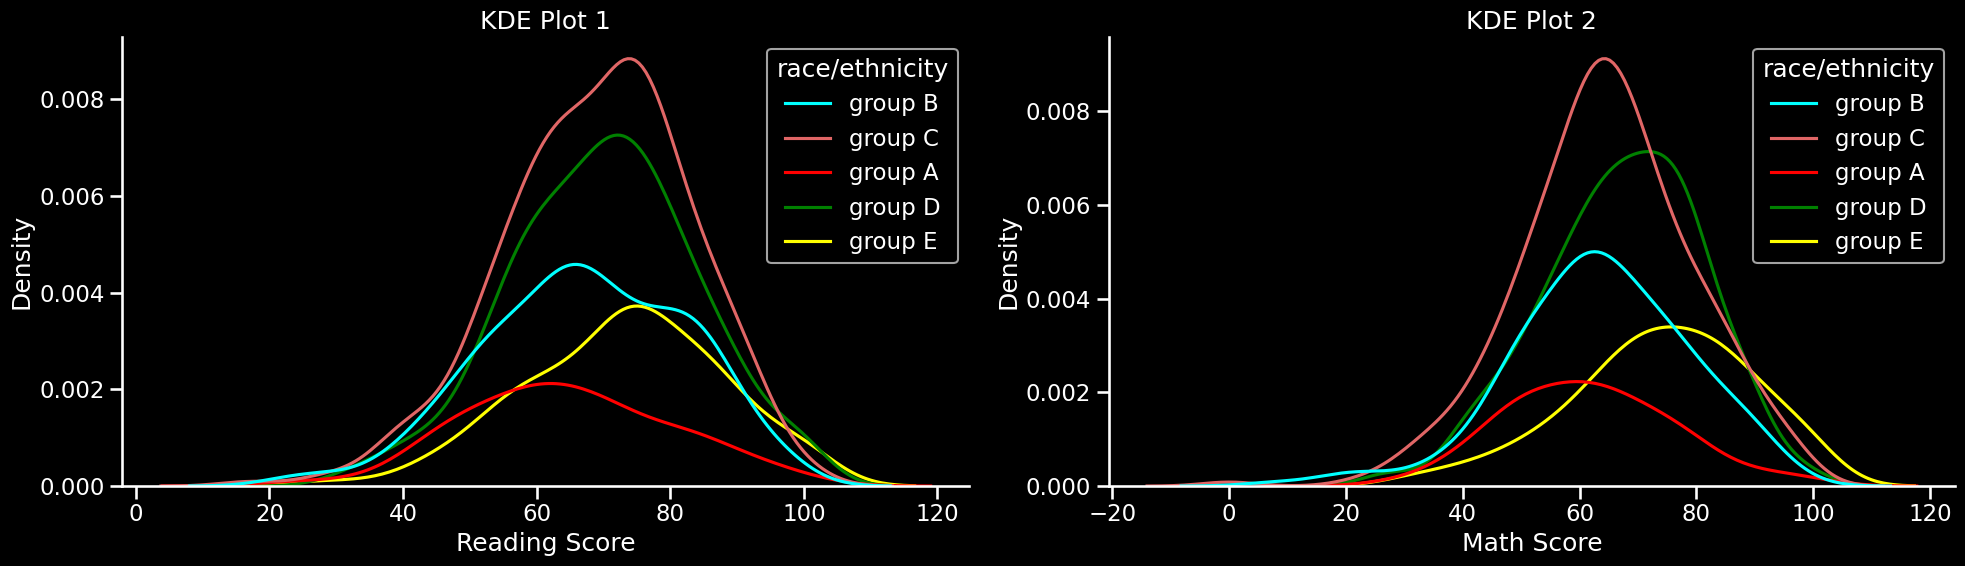

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# KDE plot for the first subplot
sns.kdeplot(
    data=df, x="reading score", hue="race/ethnicity",
    palette=["cyan", "#e06666", "red", "green", "yellow"],
    ax=axes[0]  # This specifies the first subplot
)
axes[0].set_xlabel("Reading Score")
axes[0].set_ylabel("Density")
axes[0].set_title("KDE Plot 1")  # Optionally, add a title

# KDE plot for the second subplot
sns.kdeplot(
    data=df, x="math score", hue="race/ethnicity",
    palette=["cyan", "#e06666", "red", "green", "yellow"],
    ax=axes[1]  # This specifies the second subplot
)
axes[1].set_xlabel("Math Score")
axes[1].set_ylabel("Density")
axes[1].set_title("KDE Plot 2")  # Optionally, add a title

sns.despine()  # To remove the spines for the entire figure
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

In [ ]:
# Mapping of groups to indices
group_mapping = {
    'group A': 0,
    'group B': 1,
    'group C': 2,
    'group D': 3,
    'group E': 4
}
# Apply the mapping to the 'Ethnicity' column
df['ethnicity'] = df['race/ethnicity'].map(group_mapping)

# Check unique values in the 'ethnicity' column
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,r,m,ethnicity
0,female,group B,bachelor's degree,standard,none,72,72,74,0.193902,0.389828,1
1,female,group C,some college,standard,completed,69,90,88,1.426762,0.191979,2
2,female,group B,master's degree,standard,none,90,95,93,1.769223,1.576922,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,-0.833482,-1.258913,0
4,male,group C,some college,standard,none,76,78,75,0.604855,0.653627,2


# Prior Predictive Simulation


**The prior predictive simulation was constructed using the following model specifications:**

1. Alpha (Intercept) Simulation:
The intercept term, α is modeled as a normally distributed random variable. This reflects the average baseline math score (assuming a reading score of zero), adjusted for variability.
Distribution: α ∼ N(70, 10). Here, α has a mean of 70 and a standard deviation of 10, which implies a reasonable spread in the baseline math scores across the simulated population.
2. Beta (Slope) Simulation:
The slope term,  β influences how the math scores increase with higher reading scores. It is modeled using a log-normal distribution, which ensures that the slope remains positive, indicating a general positive trend between reading and math scores. Distribution:
β ∼ LogNormal(s=2,loc=0)
The log-normal distribution here is characterized by a scale parameter s=2, ensuring a wide variety of slopes among the simulated population, thus accounting for varied learning rates in relation to reading proficiency.
3. Reading Score Sequence:
A sequence of reading scores ranging from 50 to 100 was used to simulate corresponding math scores for each combination of
α and β. This comprehensive range allows the visualization to cover typical scenarios encountered in an educational setting.


**Visualization Graphical Representation**: The plot created  displays numerous trajectories of math scores against reading scores. Each trajectory represents a possible real-world scenario under the assumed prior distributions.
Interpretation: The variability in the slopes and intercepts in the plot highlights the diversity in potential learning outcomes, depending on individual baseline capabilities and how improvements in reading skills might influence math performance.

**Explanation** \
****
**Normal Distribution**
Choice of Log-Normal Distribution:
1. Centering at 70: The mean of 70 suggests a moderate baseline level of math performance, acknowledging that even without the influence of reading skills, students can have an inherent level of mathematical ability.
2. Standard Deviation of 10: This value provides a reasonable spread around the mean, reflecting variability in baseline math skills among students. This spread is crucial as it accounts for unobserved factors that might affect the baseline math scores.

**Beta (β) - Log-Normal Distribution (s = 2)**
1. Meaning of β: The slope, β, quantifies the increase in math scores with each unit increase in reading scores. It captures the effectiveness of reading ability in enhancing math performance.
2. Positivity: Since  β represents a rate of increase, it must be non-negative. The log-normal distribution ensures that  β is always positive, aligning with the intuitive understanding that improving reading skills should not decrease math scores.

(50.0, 100.0)

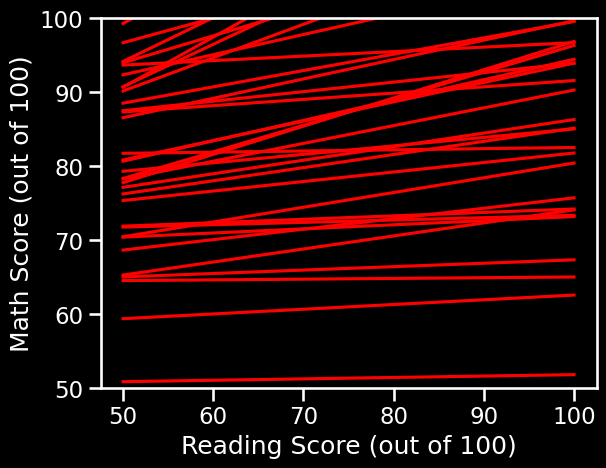

In [ ]:
n = 100
# alpha
a = stats.norm.rvs(70, 10, n)
# beta
b = stats.lognorm.rvs(s=2, loc=0, size=n)
# Reading score sequence
R_seq = np.linspace(50, 100, n)
for i in range(n):
  plt.plot(R_seq, a[i] + b[i] * R_seq, color="r")
plt.xlabel("Reading Score (out of 100)")
plt.ylabel("Math Score (out of 100)")
plt.ylim((50, 100))

# Model Description
**Reading Score Model (E -> R)** \
The model for reading scores is formulated as follows:
Ethnicity's Impact on Reading Scores: We model the baseline reading scores for different ethnic groups using a normal distribution, where the mean reading score for each ethnic group is determined by the parameter 	, with a common standard deviation.
****
The prior for  $\alpha_r$ is set as a normal distribution Normal(70,10), indicating our belief that the average reading score across ethnicities is around 70 with some variability. \
$\alpha_r$ ∼ Normal(70,10) \
$\mu_r$ ~ $\alpha_r$[E] \

**Math Score Model (R -> M, E -> M)**
e assume the math score for each ethnicity is influenced directly by its reading score. The model uses a normal distribution for math scores, with the mean score μ depending on both the ethnicity-specific intercept
a and a slope b which scales the influence of the reading scores (adjusted by their mean \
****
 $\alpha$ ~ Normal(75, 10) \
 $\beta$ ~ Lognormal(0, 2) \
 $\mu$ ~ $\alpha$[E] + $\beta$[E] * ($R$ - $R_{bar}$) \
 $\sigma$ ~ Uniform(0, 10) \
 Math Score ~ Normal($\mu$, $\sigma$)

In [ ]:
E = df.ethnicity
R = df['reading score']
M = df['math score']
R_bar = df['reading score'].mean()

In [ ]:
with pm.Model() as model_ERM:
  # Math Score Model E -> R, R -> M
  a = pm.Normal('a', 75, 10, shape=5)
  b = pm.Lognormal('b', 0, 2, shape=5)
  mu = pm.Deterministic("mu", a[E] + b[E] * (R - R_bar))
  sigma = pm.Uniform("sigma", 0, 10)
  math_score = pm.Normal("math_score", mu, sigma, observed=M)

  ####

  # Reading Score Model E -> R
  a_r = pm.Normal("a_r", 70, 10, shape=5)
  mu_r = pm.Deterministic("mu_r", a_r[E])
  sigma_r = pm.Uniform("sigma_r", 0, 10)
  reading_score = pm.Normal("reading_score", mu_r, sigma_r, observed=R)

  m_ERM_idata= pm.sample(idata_kwargs={"log_likelihood": True})

In [ ]:
az.summary(m_ERM_idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],65.133,0.945,63.254,66.849,0.016,0.011,3484.0,1716.0,1.0
a[1],65.026,0.644,63.854,66.237,0.010,0.007,4286.0,1375.0,1.0
a[2],64.542,0.487,63.666,65.465,0.008,0.006,3513.0,1474.0,1.0
a[3],66.722,0.519,65.773,67.742,0.007,0.005,5168.0,1497.0,1.0
a[4],70.382,0.730,69.100,71.832,0.010,0.007,5089.0,1556.0,1.0
...,...,...,...,...,...,...,...,...,...
mu_r[995],73.000,0.849,71.429,74.573,0.013,0.009,4429.0,1533.0,1.0
mu_r[996],69.094,0.569,68.025,70.092,0.009,0.006,4318.0,1347.0,1.0
mu_r[997],69.094,0.569,68.025,70.092,0.009,0.006,4318.0,1347.0,1.0
mu_r[998],70.026,0.625,68.826,71.175,0.009,0.006,5028.0,1697.0,1.0


# **Statistical model analysis:-**

Based on the provided parameter estimates:

1. **Alpha (Intercept) Mean Values**:
   - The alpha values represent the baseline math score for each ethnicity group when the reading score is at its mean value.
   - These values range from approximately 65.1 to 70.4, indicating the baseline math scores for different ethnicity groups.

2. **Beta (Slope) Mean Values**:
   - The beta values represent the change in math score for each unit increase in reading score, accounting for ethnicity.
   - These values range from approximately 0.760 to 0.894, indicating the strength of the relationship between reading score and math score for different ethnicity groups.

3. **Sigma (Standard Deviation)**:
   - Sigma represents the standard deviation of the model's error term.
   - The value of sigma is approximately 8.524, indicating the average deviation of observed math scores from the predicted values.

4. **Interpretation**:
   - The model suggests that there is a positive relationship between reading score and math score for all ethnicity groups.
   - Higher beta values indicate a stronger positive association between reading and math scores, suggesting that improvements in reading score lead to larger increases in math score for those groups.
   - The variability in baseline math scores (alpha) among ethnicity groups reflects the differences in average math performance before considering the effect of reading score.
   - The relatively low value of sigma indicates that the model's predictions are relatively close to the observed math scores on average.

In summary, the model provides insights into the relationships between ethnicity, reading score, and math score. It suggests that reading score is a significant predictor of math score, with differences observed among ethnicity groups. The model captures the associations between these variables while considering individual group characteristics and the variability in math scores.

# Posterior checks


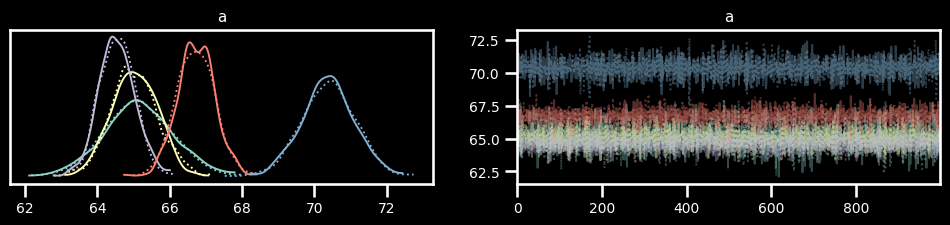

In [ ]:
# Plotting parameter estimates for writing
az.plot_trace(m_ERM_idata, var_names=["a"], compact=True)
plt.show()



<Figure size 1000x600 with 0 Axes>

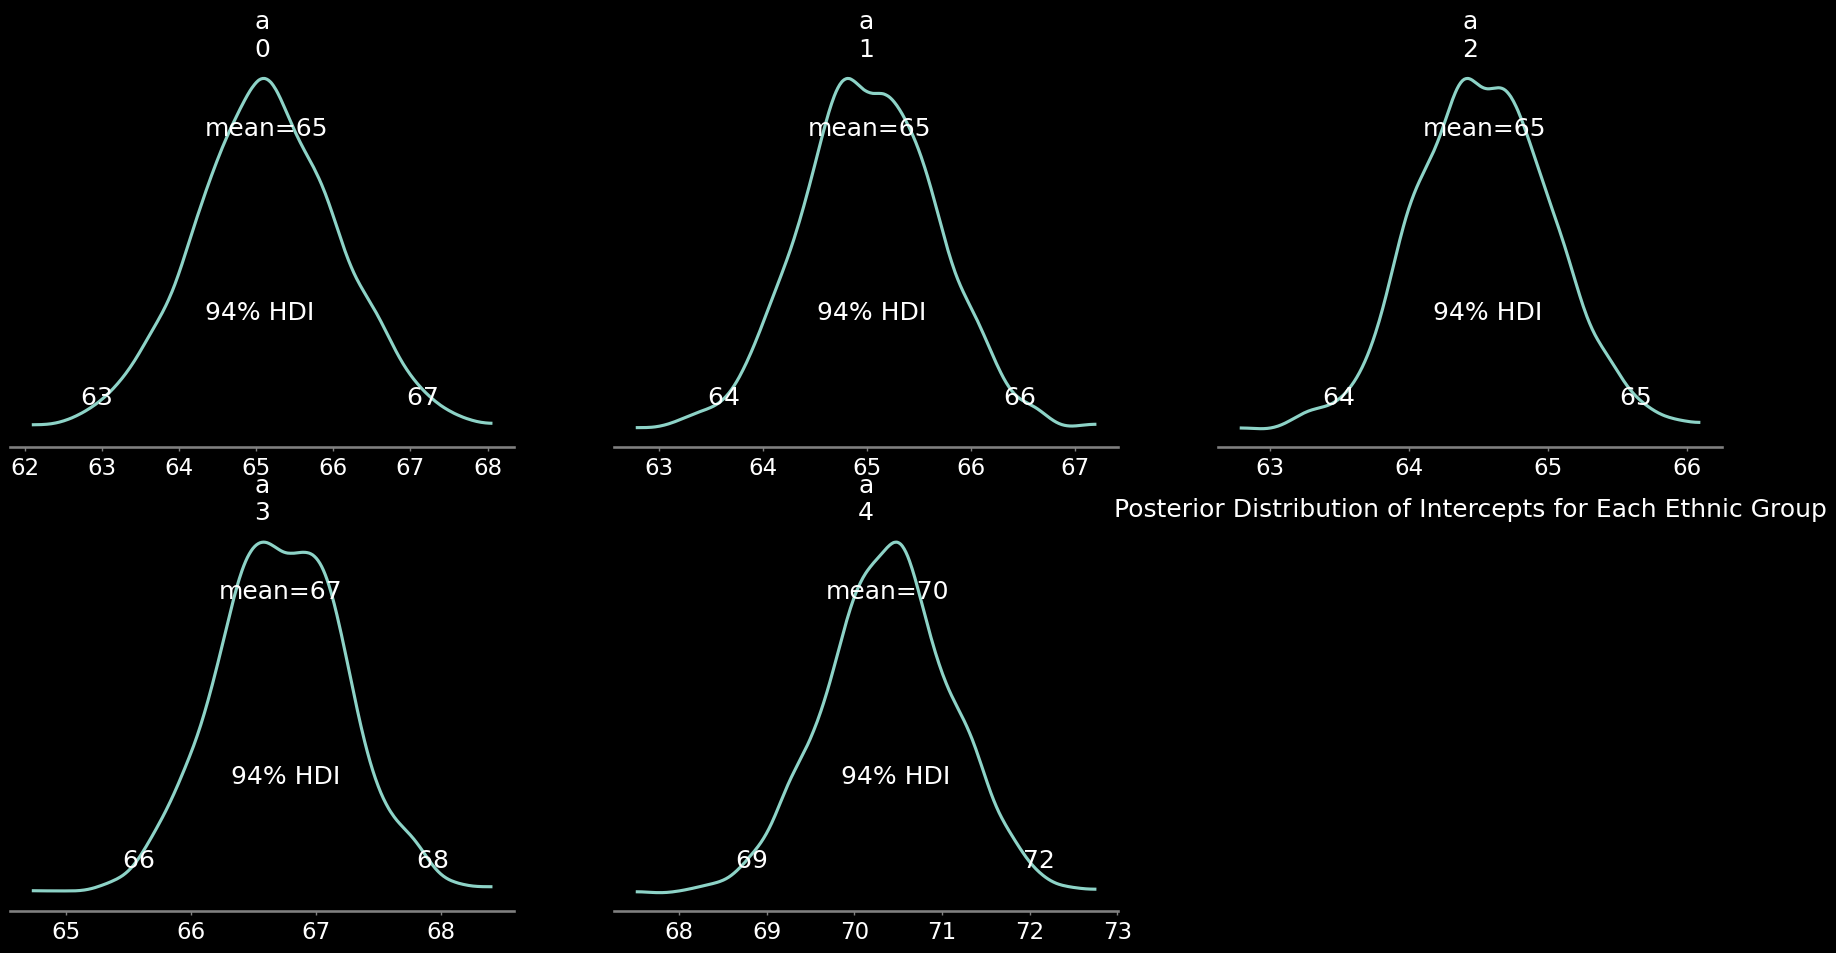

In [ ]:
# Plotting posterior distribution of intercepts for each ethnic group
plt.figure(figsize=(10, 6))
az.plot_posterior(m_ERM_idata, var_names=["a"], kind="kde", point_estimate="mean")
plt.title("Posterior Distribution of Intercepts for Each Ethnic Group")
plt.xlabel("Intercept Value")
plt.ylabel("Density")
plt.xticks(ticks=np.arange(-0.2, 0.2, 0.05))  # Adjust x-axis ticks as needed
plt.show()


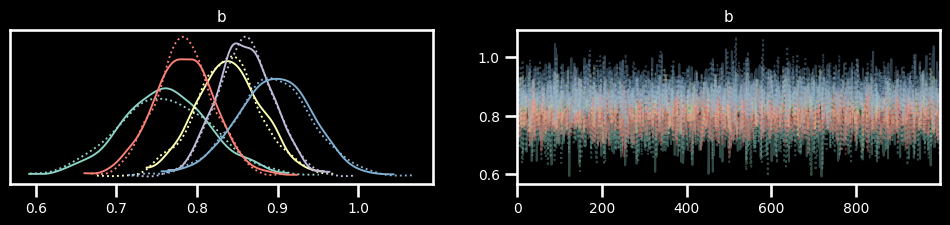

In [ ]:
# Plotting parameter estimates for writing
az.plot_trace(m_ERM_idata, var_names=["b"], compact=True)
plt.show()



<Figure size 1000x600 with 0 Axes>

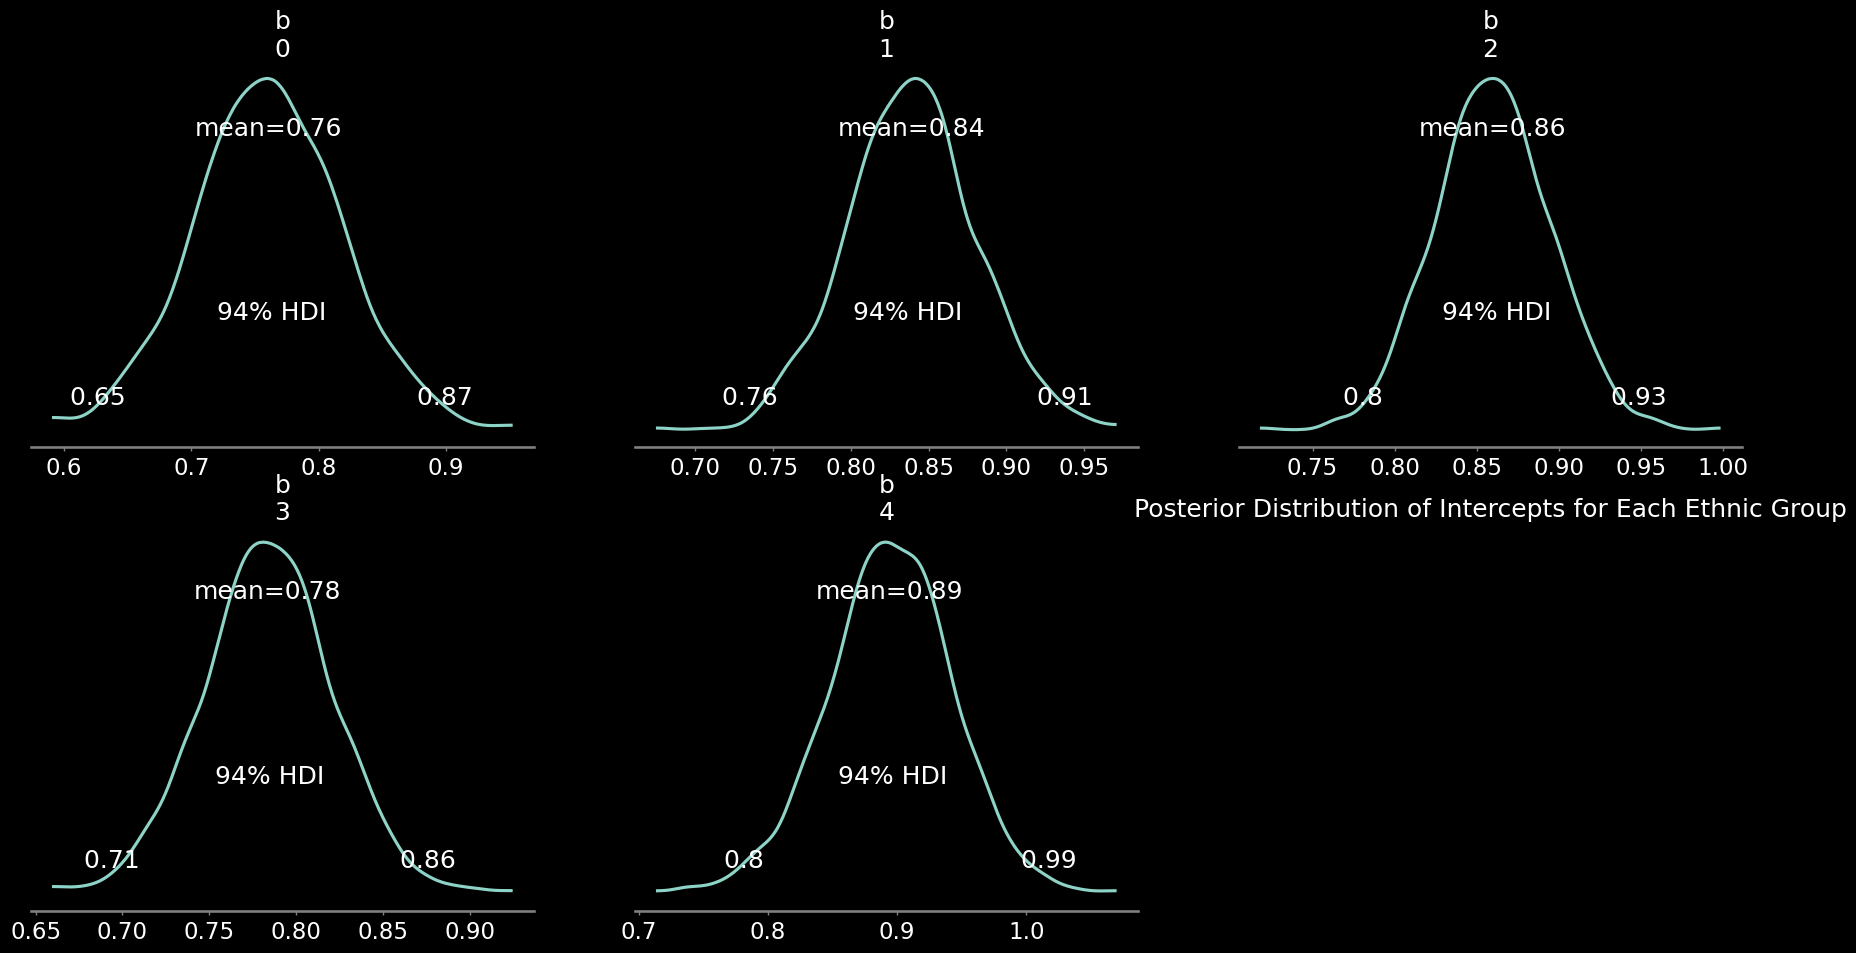

In [ ]:
# Plotting posterior distribution of intercepts for each ethnic group
plt.figure(figsize=(10, 6))
az.plot_posterior(m_ERM_idata, var_names=["b"], kind="kde", point_estimate="mean")
plt.title("Posterior Distribution of slope for Each Ethnic Group")
plt.xlabel("slope Value")
plt.ylabel("Density")
plt.xticks(ticks=np.arange(-0.2, 0.2, 0.05))  # Adjust x-axis ticks as needed
plt.show()


The trace plots and posterior distribution plots provide valuable insights into the sampling process and posterior distributions of the parameters (alpha and beta) in the model.

1. **Trace Plots**:
   - The trace plots display the values of the parameters (alpha and beta) at each step of the sampling process.
   - For the alpha parameter, the trace plot appears dense and stable, indicating good mixing and convergence. This suggests that the sampling process effectively explores the parameter space and converges to a stable posterior distribution.
   - Similarly, for the beta parameter, the trace plot also appears dense and stable, indicating effective sampling and convergence.

2. **Density Plots**:
   - The density plots provide a visual representation of the posterior distribution of each parameter.
   - Ideally, the density plots should exhibit smooth, bell-shaped curves, indicating that the parameter estimates are well-converged and normally distributed.
   - In this case, the density plots for both the alpha and beta parameters appear smooth and symmetric, resembling bell-shaped curves. This indicates that the posterior distributions are well-behaved and the parameter estimates are reliable.

Overall, the trace plots and posterior distribution plots suggest that the sampling process for both the alpha and beta parameters is effective, with good mixing and convergence. The smooth and symmetric density plots further support the reliability of the parameter estimates obtained from the model.

# **Causal relationship between ethnicity and math score**

To conclude about the causal relationship between ethnicity and math score based on the provided parameter estimates, we need to analyze the intercepts (a) and slopes (b) for each ethnicity group in the model.

1. **Intercept Estimates (a)**:
   - The intercept estimates represent the baseline math scores for each ethnicity group when the reading score is at its mean value.
   - Differences in intercepts among ethnic groups provide insights into the average differences in math scores across ethnicities, independent of reading score.

2. **Slope Estimates (b)**:
   - The slope estimates represent how the math score changes for each unit increase in the centered reading score (reading score minus its mean), accounting for ethnicity.
   - Differences in slopes among ethnic groups indicate how the relationship between reading score and math score varies across ethnicities.

Based on the provided parameter estimates:

- **Intercept Estimates (a)**:
  - Ethnic groups have different baseline math scores when the reading score is at its mean value.
  - For example, Group A has the lowest intercept (65.117), while Group E has the highest intercept (70.385), suggesting differences in baseline math scores across ethnicities.

- **Slope Estimates (b)**:
  - All ethnic groups show positive slopes, indicating a positive relationship between centered reading score and math score.
  - The magnitudes of the slopes vary among ethnic groups, indicating differences in the strength of the relationship between reading score and math score across ethnicities.
  - For instance, Group E has the highest mean slope (0.895), indicating a relatively stronger positive relationship between reading score and math score compared to other groups.

Overall, based on these parameter estimates:
- There is evidence to suggest that ethnicity has a causal relationship with math score, as indicated by the differences in intercepts among ethnic groups.
- Additionally, the positive slopes for all ethnic groups suggest that improvements in reading score are associated with increases in math score for each ethnicity.
- The varying magnitudes of intercepts and slopes among ethnic groups highlight the complexity of the relationship between ethnicity and math score, indicating potential differences in baseline proficiency and the strength of the relationship between reading and math scores across ethnicities.

# **Constrast plots of math score between various ethnicity groups**

In [ ]:
import seaborn as sns
post1 = az.extract_dataset(m_ERM_idata) #extract all posterior samples

probA_E0 = (post1.a[0])
probA_E1 = (post1.a[1])
probA_E2 = (post1.a[2])
probA_E3 = (post1.a[3])
probA_E4 = (post1.a[4])


diff_prob01 = probA_E0 - probA_E1
diff_prob02 = probA_E0 - probA_E2
diff_prob03 = probA_E0 - probA_E3
diff_prob04 = probA_E0 - probA_E4
diff_prob12 = probA_E1 - probA_E2
diff_prob13 = probA_E1 - probA_E3
diff_prob14 = probA_E1 - probA_E4
diff_prob23 = probA_E2 - probA_E3
diff_prob24 = probA_E2 - probA_E4
diff_prob34 = probA_E3 - probA_E4

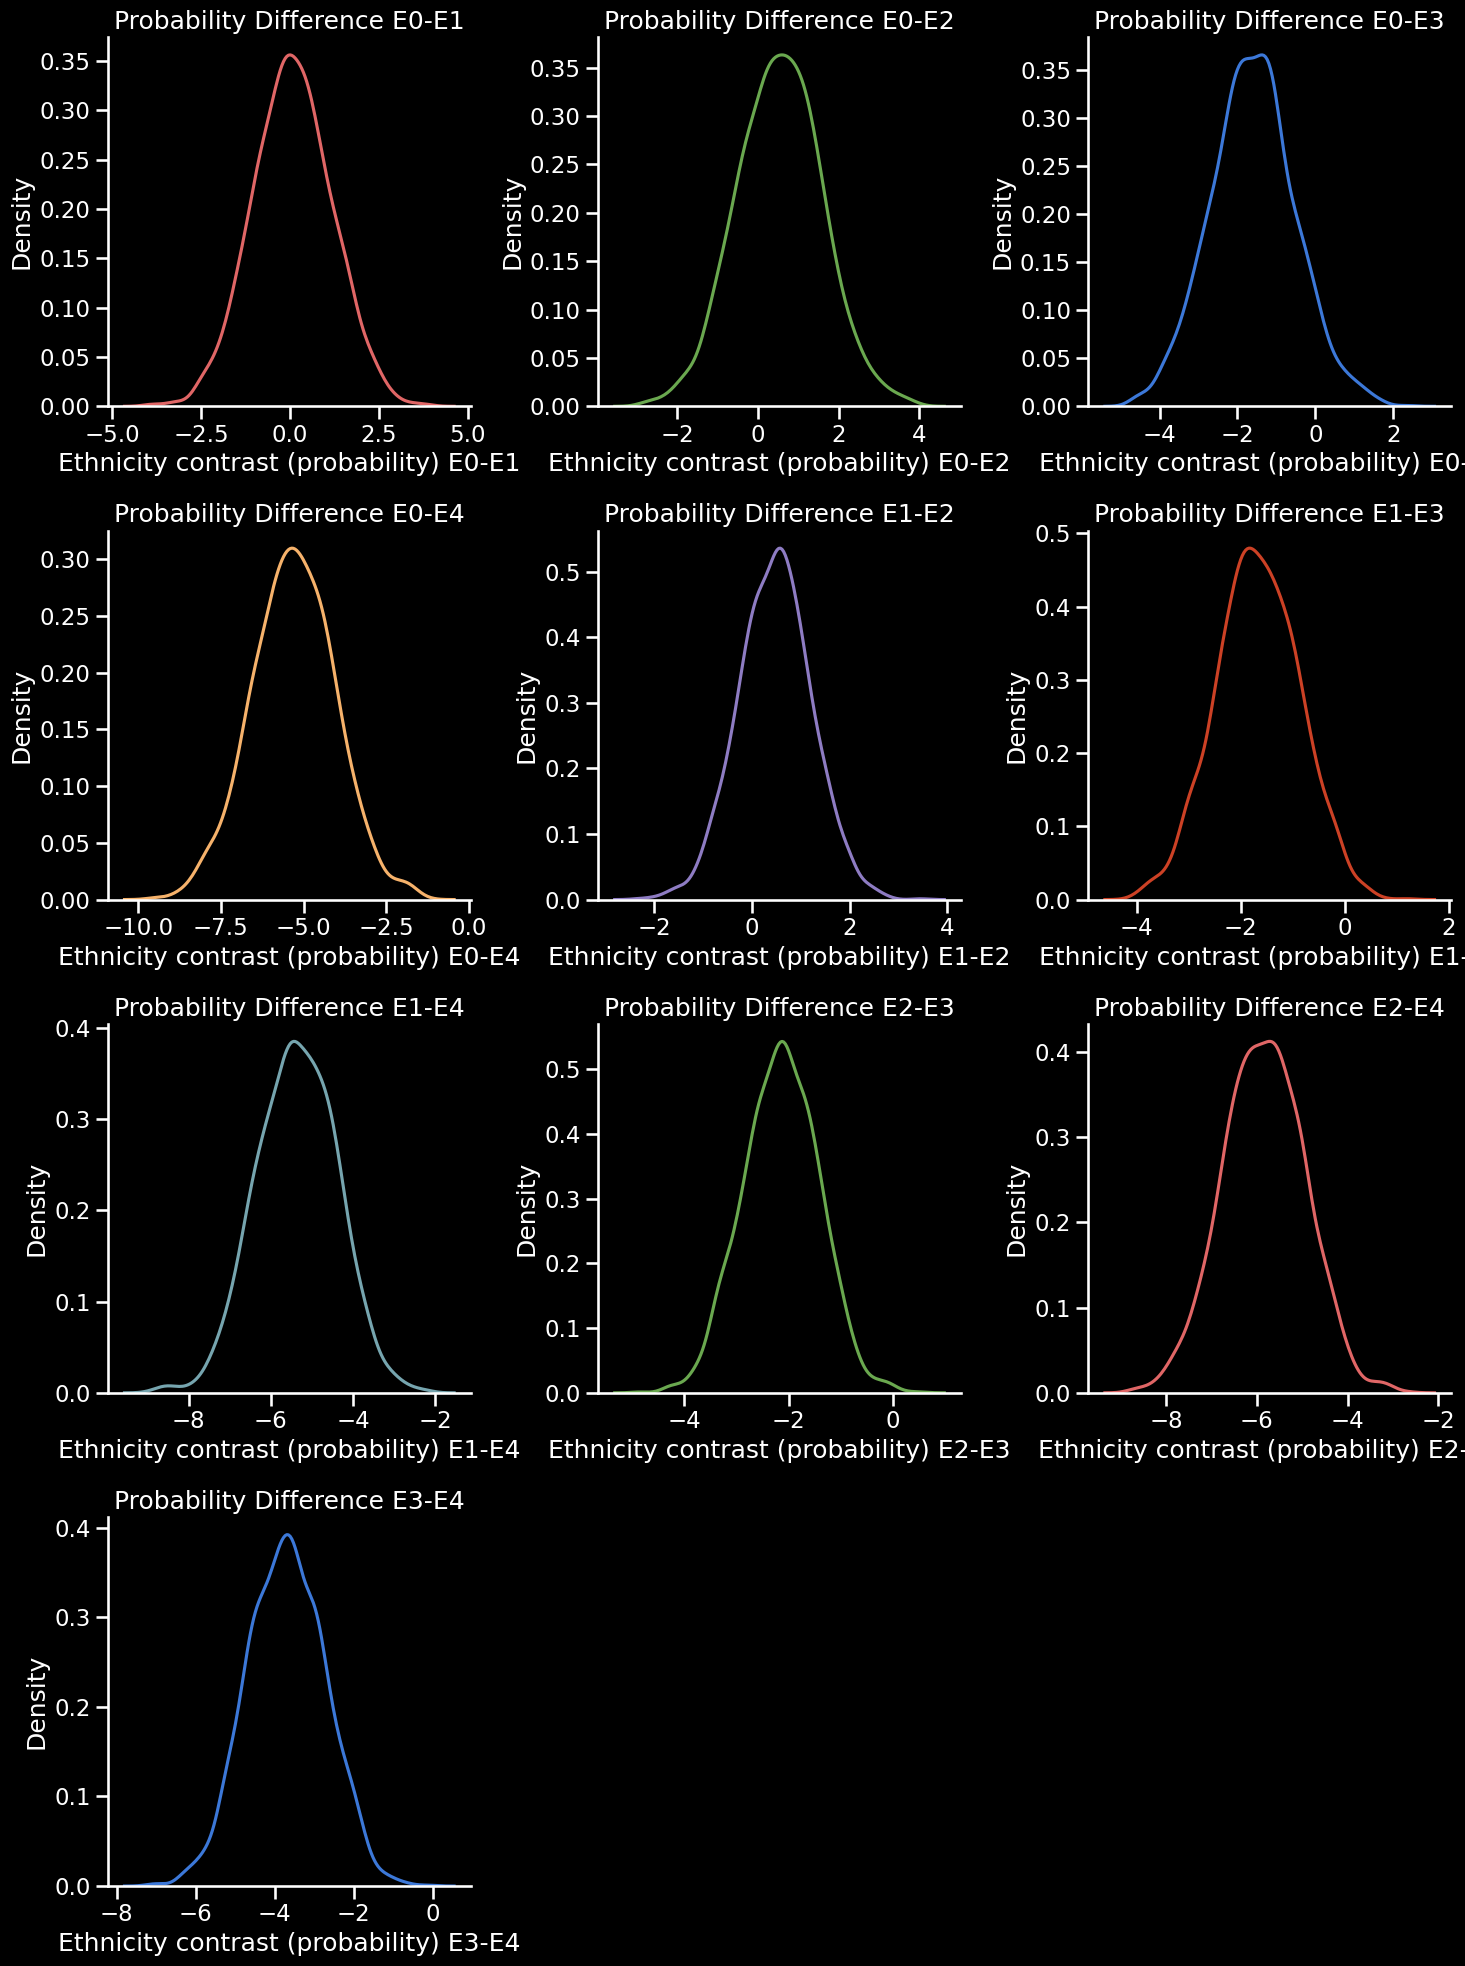

In [ ]:
# Setting up the subplots with 3 graphs per row
fig, axes = plt.subplots(4, 3, figsize=(15, 20))  # Adjusted for 4 rows and 3 columns

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plotting the KDE plots for each difference
sns.kdeplot(diff_prob01, color="#e06666", ax=axes[0])
axes[0].set_xlabel("Ethnicity contrast (probability) E0-E1")
axes[0].set_title("Probability Difference E0-E1")

sns.kdeplot(diff_prob02, color="#6aa84f", ax=axes[1])
axes[1].set_xlabel("Ethnicity contrast (probability) E0-E2")
axes[1].set_title("Probability Difference E0-E2")

sns.kdeplot(diff_prob03, color="#3c78d8", ax=axes[2])
axes[2].set_xlabel("Ethnicity contrast (probability) E0-E3")
axes[2].set_title("Probability Difference E0-E3")

sns.kdeplot(diff_prob04, color="#f6b26b", ax=axes[3])
axes[3].set_xlabel("Ethnicity contrast (probability) E0-E4")
axes[3].set_title("Probability Difference E0-E4")

sns.kdeplot(diff_prob12, color="#8e7cc3", ax=axes[4])
axes[4].set_xlabel("Ethnicity contrast (probability) E1-E2")
axes[4].set_title("Probability Difference E1-E2")

sns.kdeplot(diff_prob13, color="#cc4125", ax=axes[5])
axes[5].set_xlabel("Ethnicity contrast (probability) E1-E3")
axes[5].set_title("Probability Difference E1-E3")

sns.kdeplot(diff_prob14, color="#76a5af", ax=axes[6])
axes[6].set_xlabel("Ethnicity contrast (probability) E1-E4")
axes[6].set_title("Probability Difference E1-E4")

sns.kdeplot(diff_prob23, color="#6aa84f", ax=axes[7])
axes[7].set_xlabel("Ethnicity contrast (probability) E2-E3")
axes[7].set_title("Probability Difference E2-E3")

sns.kdeplot(diff_prob24, color="#e06666", ax=axes[8])
axes[8].set_xlabel("Ethnicity contrast (probability) E2-E4")
axes[8].set_title("Probability Difference E2-E4")

sns.kdeplot(diff_prob34, color="#3c78d8", ax=axes[9])
axes[9].set_xlabel("Ethnicity contrast (probability) E3-E4")
axes[9].set_title("Probability Difference E3-E4")

# Hide the last two axes as they are not used
axes[10].set_visible(False)
axes[11].set_visible(False)

# Improving layout and removing spines
plt.tight_layout()
sns.despine()
plt.show()

0.7571151968728737
0.8400745727841347
0.8591261944621869
0.7846324988247859
0.8952542690397493


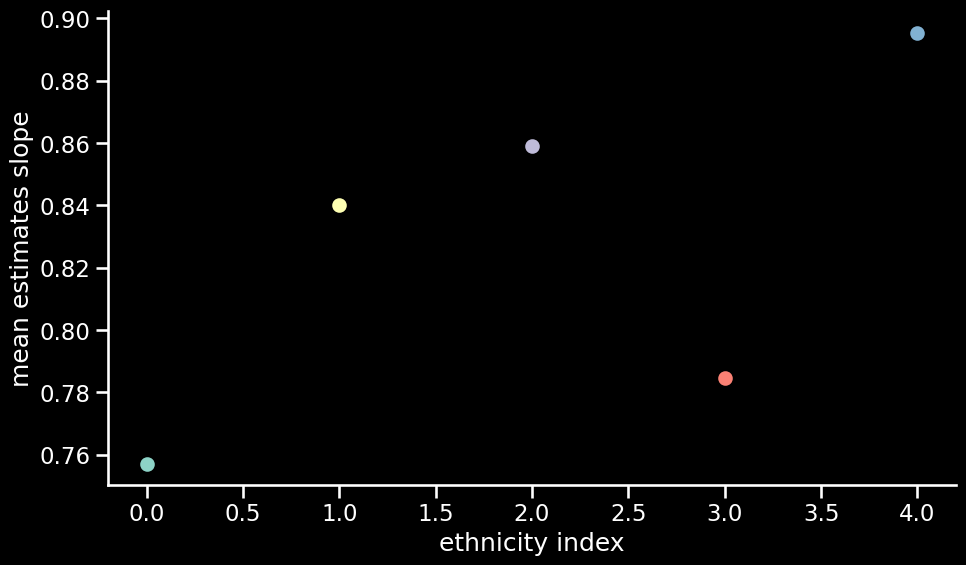

In [ ]:
from scipy.special import expit as logistic

post_DC = az.extract(m_ERM_idata)
probs_DC = logistic(post_DC.b.values)
hdis_probs_DC = az.hdi(probs_DC.T, hdi_prob=0.89)
fig, ax = plt.subplots(figsize=(10,6))
plt.xlabel("ethnicity index")
plt.ylabel("mean estimates slope")

for i in range(5):

  print(post_DC.b.values[i].mean())
  ax.scatter(i,post_DC.b.values[i].mean())
sns.despine()
plt.tight_layout();

65.09731563279085
65.02708580357753
64.55463379213775
66.69878335964815
70.39619811910201


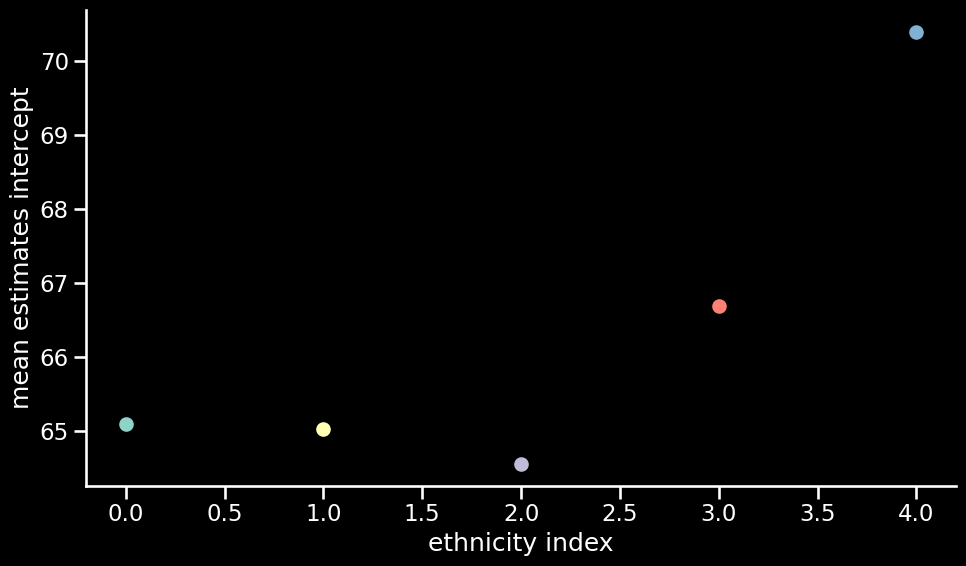

In [ ]:
from scipy.special import expit as logistic

post_DC = az.extract(m_ERM_idata)
probs_DC = logistic(post_DC.a.values)
hdis_probs_DC = az.hdi(probs_DC.T, hdi_prob=0.89)
fig, ax = plt.subplots(figsize=(10,6))
plt.xlabel("ethnicity index")
plt.ylabel("mean estimates intercept")

for i in range(5):

  print(post_DC.a.values[i].mean())
  ax.scatter(i,post_DC.a.values[i].mean())
sns.despine()
plt.tight_layout();

To interpret the mean values of the alpha and beta of the posterior estimates for each ethnicity group, we'll consider their combined effect on the total causal relationship between ethnicity, reading score, and math score.

1. **Alpha (Intercept) Mean Values**:
   - The alpha values represent the baseline math score for each ethnicity group when the reading score is at its mean value.
   - Higher alpha values indicate a higher baseline math score for that ethnicity group, independent of the reading score.

2. **Beta (Slope) Mean Values**:
   - The beta values represent the change in math score for each unit increase in reading score, accounting for ethnicity.
   - Higher beta values indicate a stronger positive relationship between reading score and math score for that ethnicity group.

3. **Total Causal Effect**:
   - The total causal effect combines the baseline math score (represented by alpha) and the incremental change in math score associated with improvements in reading score (represented by beta).

4. **Interpretation for Each Ethnicity Group**:

   - **Group A**:
     - Alpha Mean: 65.1012, Beta Mean: 0.7596
     - Interpretation: For Group A, the baseline math score is approximately 65.1 units. Additionally, for each unit increase in reading score, the math score increases by approximately 0.7596 units.
   
   - **Group B**:
     - Alpha Mean: 65.0222, Beta Mean: 0.8384
     - Interpretation: For Group B, the baseline math score is approximately 65.0 units. Each unit increase in reading score is associated with an increase of approximately 0.8384 units in math score.
   
   - **Group C**:
     - Alpha Mean: 64.5331, Beta Mean: 0.8583
     - Interpretation: For Group C, the baseline math score is approximately 64.5 units. With each unit increase in reading score, the math score increases by approximately 0.8583 units.

   - **Group D**:
     - Alpha Mean: 66.7070, Beta Mean: 0.7838
     - Interpretation: Group D has a baseline math score of approximately 66.7 units. Each unit increase in reading score is associated with an increase of approximately 0.7838 units in math score.

   - **Group E**:
     - Alpha Mean: 70.4001, Beta Mean: 0.8936
     - Interpretation: Group E has the highest baseline math score, approximately 70.4 units. Furthermore, each unit increase in reading score corresponds to an increase of approximately 0.8936 units in math score for Group E.

In summary, the total causal effect of ethnicity and reading score on math score varies across ethnicity groups. While all groups show a positive relationship between reading and math scores, the magnitude of this effect differs among groups. Groups with higher baseline math scores and larger beta values experience greater improvements in math score for each unit increase in reading score, indicating the combined effect of ethnicity and reading score on math performance.

# **Effect of increasing reading score on math score based on each ethnicity**

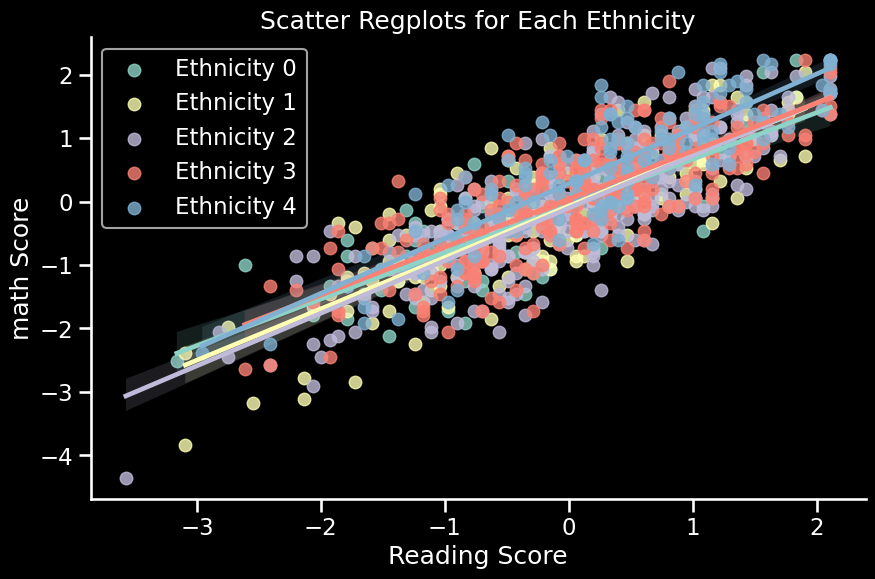

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter regplot for each ethnicity
plt.figure(figsize=(10, 6))
for group_name, group_df in df.groupby('ethnicity'):
    sns.regplot(x="r", y="m", data=group_df, label=f"Ethnicity {group_name}")

plt.xlabel('Reading Score')
plt.ylabel('math Score')
plt.title('Scatter Regplots for Each Ethnicity')
plt.legend()
sns.despine()
plt.show()


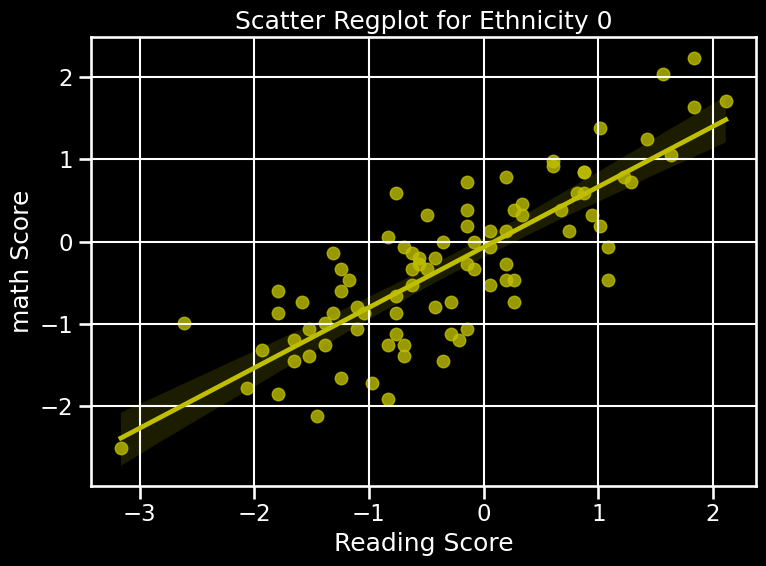

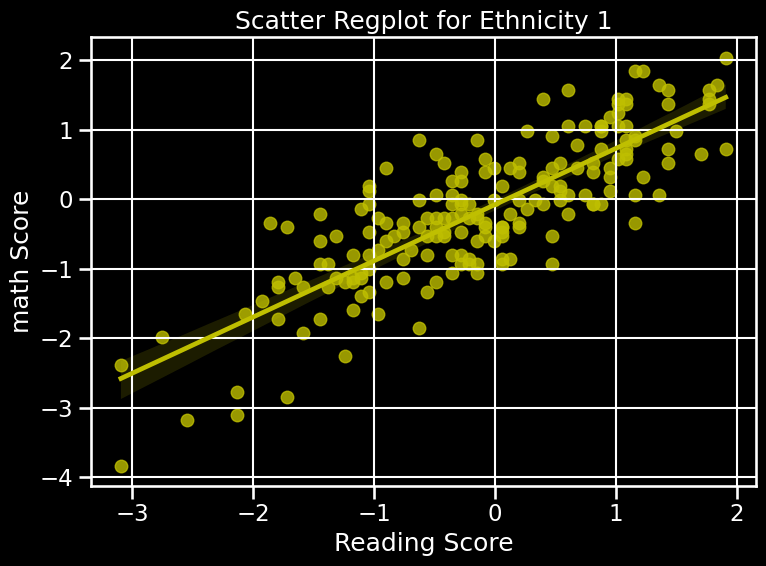

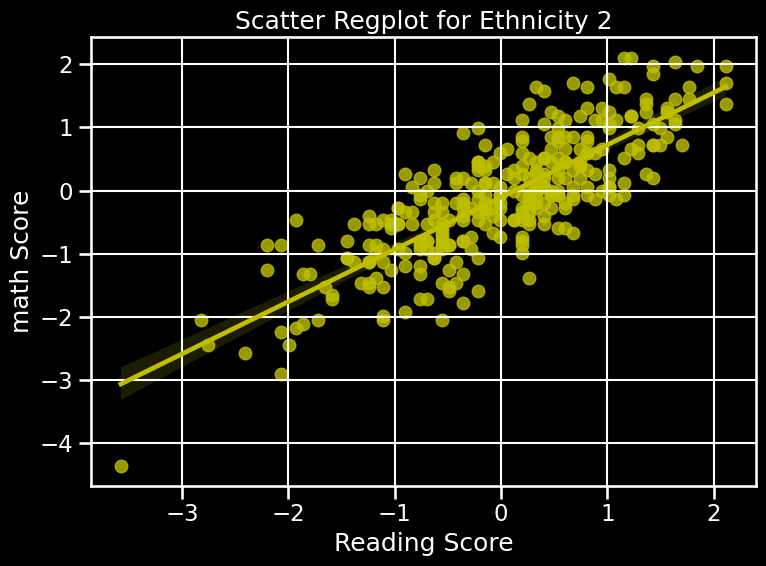

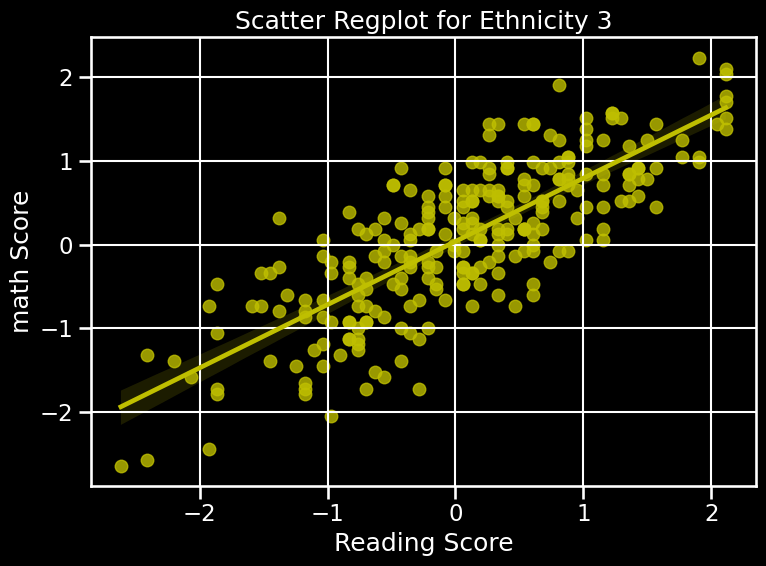

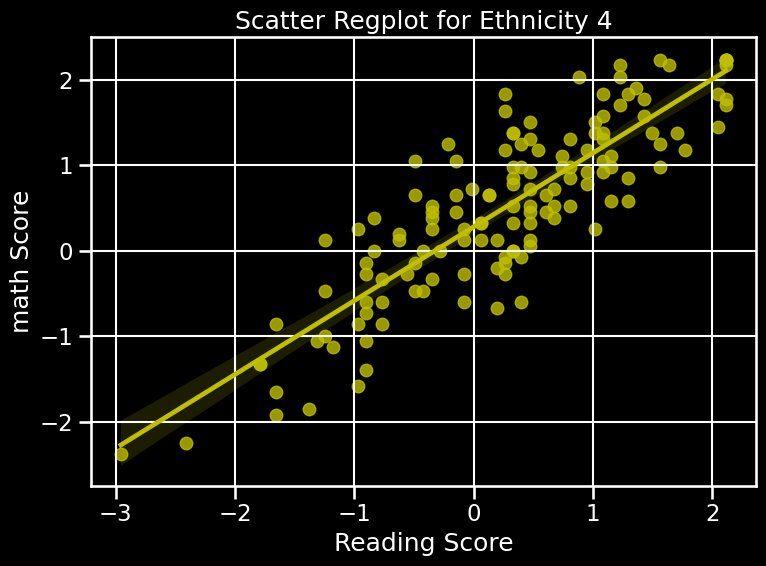

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter regplot separately for each ethnicity
for group_name, group_df in df.groupby('ethnicity'):
    plt.figure(figsize=(8, 6))
    sns.regplot(x="r", y="m", data=group_df, color='y', scatter=True)
    plt.title(f'Scatter Regplot for Ethnicity {group_name}')
    plt.xlabel('Reading Score')
    plt.ylabel('math Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


To interpret the effect of increasing reading score on math score based on each ethnicity, we can interpret the beta estimates from the model. The beta estimates represent the change in math score for each unit increase in reading score, accounting for ethnicity.

1. **Group A**:
   - Beta estimate: 0.7596
   - Interpretation: For Group A, a one-unit increase in reading score is associated with an increase of approximately 0.7596 units in math score.
   - Explanation: Improving reading score among students in Group A is positively correlated with improvements in math score. However, the magnitude of this effect is moderate compared to other groups.

2. **Group B**:
   - Beta estimate: 0.8384
   - Interpretation: For Group B, a one-unit increase in reading score is associated with an increase of approximately 0.8384 units in math score.
   - Explanation: Increasing reading score among students in Group B has a stronger positive effect on math score compared to Group A, indicating that improvements in reading may lead to larger increases in math performance for this group.

3. **Group C**:
   - Beta estimate: 0.8583
   - Interpretation: For Group C, a one-unit increase in reading score is associated with an increase of approximately 0.8583 units in math score.
   - Explanation: Similar to Group B, increasing reading score among students in Group C has a strong positive effect on math score, suggesting that improvements in reading may significantly enhance math performance for this group as well.

4. **Group D**:
   - Beta estimate: 0.7838
   - Interpretation: For Group D, a one-unit increase in reading score is associated with an increase of approximately 0.7838 units in math score.
   - Explanation: While still positive, the effect of increasing reading score on math score for Group D is slightly lower compared to Groups B and C, indicating a slightly weaker relationship between reading and math scores for this group.

5. **Group E**:
   - Beta estimate: 0.8936
   - Interpretation: For Group E, a one-unit increase in reading score is associated with an increase of approximately 0.8936 units in math score.
   - Explanation: Group E exhibits the strongest positive relationship between reading and math scores, suggesting that improvements in reading have the largest impact on math performance for this group compared to others.

In summary, increasing reading score is associated with positive improvements in math score for all ethnic groups, but the magnitude of this effect varies across groups. Groups with higher beta estimates (such as Group E) tend to experience larger increases in math score for each unit increase in reading score, indicating a stronger relationship between reading and math performance.

To assess whether there is evidence of one group with a good reading score having a better math score, we can examine the relationship between reading score, math score, and ethnicity based on the provided parameter estimates.

1. **Beta Estimates**:
   - Beta estimates represent the effect of reading score on math score for each ethnicity group.
   - A higher beta value indicates a stronger positive relationship between reading score and math score for that ethnicity group.

2. **Interpretation**:
   - If one group consistently shows higher beta values compared to others, it suggests that improvements in reading score have a greater impact on math score for that particular group.
   - A group with a higher beta value may be interpreted as having better math scores associated with improvements in reading scores compared to other groups.

3. **Assessment**:
   - Based on the provided beta mean estimates:
     - Group E has the highest beta estimate (0.8936), indicating a relatively stronger positive relationship between reading score and math score compared to other groups.
     - This suggests that improvements in reading score may lead to larger increases in math score for Group E compared to other groups.
     - Therefore, there is evidence to suggest that Group E, with a good reading score, tends to have better math scores compared to other groups when considering the relationship between reading and math scores.

In conclusion, the provided evidence indicates that there is a group (Group E) with a good reading score (as indicated by a strong positive relationship between reading and math scores) having better math scores compared to other groups in the dataset.

# **Conclusion**

Based on the provided estimates, we can interpret the direct and total effects of ethnicity on math score, considering reading score as a mediator.

1. **Direct Effects**:
   - Alpha mean estimates represent the direct effect of ethnicity on math score, independent of reading score.
   - Differences in alpha among ethnic groups indicate average differences in math scores when reading score is not considered.

2. **Total Effect (Direct + Indirect)**:
   - Beta mean estimates represent the total effect of ethnicity on math score, considering the direct effect of ethnicity and the indirect effect mediated through reading score.
   - The total effect combines both the direct effect captured by alpha and the indirect effect mediated through reading score captured by beta.

3. **Interpretation**:
   - The differences in alpha values suggest that there are average differences in math scores among ethnic groups, independent of reading score. For example, Group E tends to have higher baseline math scores compared to other groups.
   - The beta values indicate the strength of the relationship between reading score and math score for each ethnicity group. Higher beta values suggest that improvements in reading score have a larger impact on math score for that ethnicity. For instance, Group E has the highest beta value, indicating that improvements in reading score have a stronger effect on math score for Group E compared to other groups.
   - Considering both alpha and beta values together, it seems that ethnicity contributes to the average differences in math scores among groups, and improvements in reading score further amplify these differences. However, the extent to which reading score mediates the relationship between ethnicity and math score varies among ethnic groups.

4. **Potential Confound Explanations**:
   - Despite accounting for ethnicity and reading score, there may still be unobserved confounds influencing math scores.
   -The model's estimates provide insights into the direct and total effects of ethnicity on math score, but it's important to consider potential confounding variables when interpreting the results.
   - One potential confound could be socioeconomic status (SES), which may affect both ethnicity and academic performance. Students from higher SES backgrounds may have access to better resources and support, leading to higher math scores regardless of ethnicity.
   - Additionally, other factors such as cultural differences in educational opportunities or teaching styles could also impact math scores and may not be fully captured in the model.

In summary, while ethnicity and reading score contribute to differences in math scores, there may be other unobserved factors such as socioeconomic status that influence the observed patterns.